In [35]:
import numpy as np
from scipy.special import log_ndtr
import matplotlib.pyplot as plt
import nestle
import corner

In [5]:
def model(x,params):
    return params[0]*x + params[1] 

In [6]:
params_true = [3.2, 5.6]

In [8]:
x_det = np.linspace(0,10,20)
y_det = model(x_det, params_true) + np.random.randn(len(x_det))

In [59]:
x_cen = np.array([2.3, 5.3, 6.7, 9.7])
y_cen = model(x_cen, params_true) + 2*np.abs(np.random.randn(len(x_cen)))

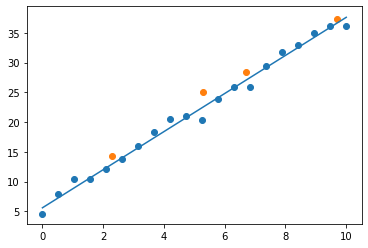

In [60]:
plt.scatter(x_det, y_det)
plt.scatter(x_cen, y_cen)
plt.plot(x_det, model(x_det, params_true))

In [61]:
def lnlike(params):
    a,b,err = params
    res_det = (y_det - model(x_det,[a,b]))/err
    res_cen = (y_cen - model(x_cen,[a,b]))/err
    
    lnlike_det = -0.5*sum(res_det**2) - len(res_det)*np.log(err)
    lnlike_cen = sum(log_ndtr(res_cen))
    
    return lnlike_det + lnlike_cen

In [62]:
def prior_transform(cube):
    return 0 + 10*cube

In [63]:
ndim = 3

In [64]:
result = nestle.sample(lnlike, prior_transform, ndim, callback=nestle.print_progress)

it=  1067 logz=-19.18320577738

In [65]:
params_est_mean, params_est_std = nestle.mean_and_cov(result.samples, weights=result.weights)

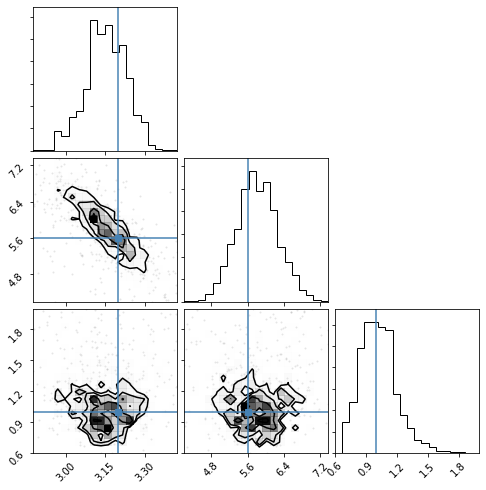

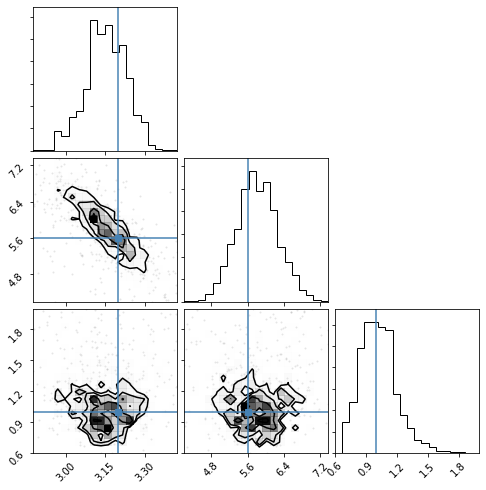

In [66]:
corner.corner(result.samples, weights=result.weights, range=[0.999]*3, truths=params_true+[1])

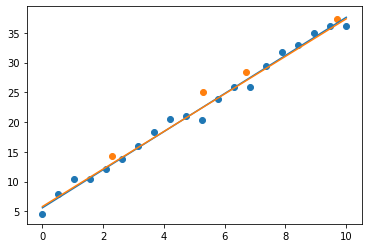

In [67]:
plt.scatter(x_det, y_det)
plt.scatter(x_cen, y_cen)
plt.plot(x_det, model(x_det, params_true))
plt.plot(x_det, model(x_det, params_est_mean[:-1]))